In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
courses = pd.read_csv(r"C:\Users\8_USER\Desktop\Ανθούλα\python\udemy courses data analysis\Udemy Courses.csv")

In [3]:
courses.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [4]:
#delete duplicate rows
courses.drop_duplicates(inplace = True)
courses.drop_duplicates(subset = 'course_title', keep = 'first', inplace = True)

In [5]:
courses.subject.unique()

array(['Musical Instruments', 'Business Finance', 'Graphic Design',
       'Web Development'], dtype=object)

In [6]:
#number of courses of each subject category
courses.subject.value_counts(ascending = True)

Graphic Design          600
Musical Instruments     676
Business Finance       1195
Web Development        1196
Name: subject, dtype: int64

In [7]:
courses.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

In [8]:
#replace 'Free' values in price column
courses['price'].replace({'Free': '0'}, inplace = True)
#change the data type of price column to numeric
courses['price'] = pd.to_numeric(courses['price'])
courses.dtypes

course_id               int64
course_title           object
is_paid                  bool
price                   int64
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
dtype: object

In [9]:
#min price of each subject category
courses.groupby('subject').price.min()

subject
Business Finance       0
Graphic Design         0
Musical Instruments    0
Web Development        0
Name: price, dtype: int64

In [10]:
#max price of each subject category
courses.groupby('subject').price.max()

subject
Business Finance       200
Graphic Design         200
Musical Instruments    200
Web Development        200
Name: price, dtype: int64

In [11]:
#mean price of each subject category
courses.groupby('subject').price.mean()

subject
Business Finance       68.564854
Graphic Design         58.016667
Musical Instruments    49.341716
Web Development        77.169732
Name: price, dtype: float64

In [12]:
#number of courses according to subject and level
courses.groupby(['subject', 'level']).size()

subject              level             
Business Finance     All Levels            696
                     Beginner Level        340
                     Expert Level           31
                     Intermediate Level    128
Graphic Design       All Levels            298
                     Beginner Level        241
                     Expert Level            5
                     Intermediate Level     56
Musical Instruments  All Levels            276
                     Beginner Level        294
                     Expert Level            7
                     Intermediate Level     99
Web Development      All Levels            657
                     Beginner Level        389
                     Expert Level           15
                     Intermediate Level    135
dtype: int64

In [13]:
#number of subscribers according to whether the course is free of cost or not
courses.groupby('is_paid').num_subscribers.sum()

is_paid
False    3573088
True     8132569
Name: num_subscribers, dtype: int64

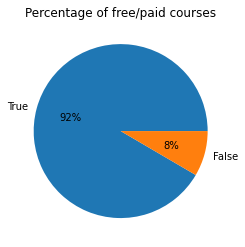

In [14]:
courses['is_paid'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Percentage of free/paid courses')
plt.ylabel('')
plt.show()

In [15]:
#top 5 courses according to the number of subscribers
courses.nlargest(5, ['num_subscribers'])

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,0,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,0,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,0,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development


In [16]:
#least 5 courses according to the number of subscribers and price
courses.nsmallest(5, ['num_subscribers', 'price'])

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
37,1234656,4 Week Rhythm Mastery,True,20,0,0,28,Beginner Level,2.5 hours,2017-07-05T16:07:44Z,Musical Instruments
91,1265814,ABRSM Grade III Piano Class - Handel Sonatina ...,True,20,0,0,5,Beginner Level,31 mins,2017-07-06T16:12:34Z,Musical Instruments
98,1219820,Accounting - The 6 most important rules you mu...,True,20,0,0,9,All Levels,1 hour,2017-05-25T21:55:50Z,Business Finance
185,872262,Adobe Photoshop pentru Social Media,True,20,0,0,12,Beginner Level,34 mins,2016-06-08T16:02:39Z,Graphic Design
476,1252410,Beginners Guide to Kindle Ebook Covers Design ...,True,20,0,0,16,All Levels,1.5 hours,2017-06-19T19:26:46Z,Graphic Design


In [17]:
#show all the courses that are related with 'sql' and the price is less than or equal to 50
courses[(courses.course_title.str.contains('sql')) & (courses.price <= 50)]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
618,1201054,Build CRUD Application - PHP & Mysql,False,0,4405,71,12,Beginner Level,1.5 hours,2017-05-04T16:47:24Z,Web Development
897,1189508,Create a social network using PHP Mysqli HTML ...,True,40,1477,17,27,Intermediate Level,6 hours,2017-04-24T00:18:42Z,Web Development
900,1176460,Create Ajax Chat App with PHP & Mysql,True,45,540,11,19,Beginner Level,1 hour,2017-04-15T00:56:41Z,Web Development
2607,1008246,Modern E-Commerce Store In php & mysqli With B...,True,50,240,45,358,All Levels,66.5 hours,2016-12-09T16:18:49Z,Web Development


In [18]:
#make and add two new columns of date and time to the dataframe from published_timestamp column
#convert the published_timestamp column into two new columns (published_date and published_time)
courses['published_timestamp'] = pd.to_datetime(courses.published_timestamp)
courses['published_date'] = pd.to_datetime(courses['published_timestamp']).dt.date
courses['published_time'] = pd.to_datetime(courses['published_timestamp']).dt.time
del courses['published_timestamp']

In [19]:
#courses that published in the first semester of 2016
courses['published_date'] = pd.to_datetime(courses['published_date'])
courses[(courses['published_date'].dt.year == 2016) & ((courses['published_date'].dt.month >= 1) & (courses['published_date'].dt.month <= 6))]

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_date,published_time
7,768028,* An Integrated Approach to the Fundamentals o...,True,200,134,14,123,All Levels,5.5 hours,Business Finance,2016-03-15,17:23:07
9,738910,[Value Investing] Where White People Keep Thei...,True,200,2715,70,20,Expert Level,4 hours,Business Finance,2016-05-25,21:04:41
22,759972,150 Rock Guitar Licks You MUST Know,True,45,252,14,21,All Levels,4.5 hours,Musical Instruments,2016-02-19,17:24:14
25,638966,188% Profit in 1Year - Forex ALGO Robot Tradin...,True,120,357,71,20,All Levels,2 hours,Business Finance,2016-05-03,19:04:41
50,665042,8 Beautiful Ruby on Rails Apps in 30 Days & TD...,True,100,5962,466,132,All Levels,16 hours,Web Development,2016-03-08,07:36:40
...,...,...,...,...,...,...,...,...,...,...,...,...
3607,722754,WordPress Development Crash Course: From Zero ...,True,60,1699,8,22,All Levels,2 hours,Web Development,2016-02-01,22:07:26
3608,882488,WordPress Development For Beginners,True,95,23572,210,20,All Levels,2 hours,Web Development,2016-06-20,18:46:15
3640,774910,WordPress: Create an Amazing Website With Ease,True,200,1109,13,24,All Levels,2.5 hours,Web Development,2016-05-03,19:53:12
3651,424864,Write PHP Like a Pro: Build a PHP MVC Framewor...,True,70,1703,435,65,All Levels,3 hours,Web Development,2016-02-04,22:36:17


In [20]:
courses.head(3)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_date,published_time
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,Musical Instruments,2014-09-18,05:07:05
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,Musical Instruments,2017-04-12,19:06:34
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,Musical Instruments,2017-04-26,18:34:57


In [21]:
#apply a 20% discount on the price of each course
courses.insert(4, 'discount_price', courses['price'].apply(lambda x:x-0.2*x))
courses.head(3)

,course_id,course_title,is_paid,price,discount_price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_date,published_time
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,28.0,3137,18,68,All Levels,1.5 hours,Musical Instruments,2014-09-18,05:07:05
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,60.0,1593,1,41,Intermediate Level,1 hour,Musical Instruments,2017-04-12,19:06:34
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,60.0,482,1,47,Intermediate Level,1.5 hours,Musical Instruments,2017-04-26,18:34:57


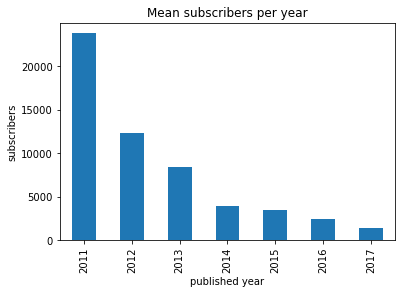

In [22]:
subs_per_year = courses.groupby(courses['published_date'].dt.year).num_subscribers.mean()
subs_per_year.plot(kind = 'bar')
plt.title('Mean subscribers per year')
plt.xlabel('published year')
plt.ylabel('subscribers')
plt.show()